In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
%matplotlib inline

In [6]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
column = 'Daily_Usage_Hours'
data = df[column].dropna()

In [7]:
print(f"Работаем со столбцом: {column}")

Работаем со столбцом: Daily_Usage_Hours


In [8]:
# Задание 1
# Рассчитайте характеристики: Среднее, Дисперсия, Мода, Медиана, Квантили уровня 0.25, 0.5, 0.75, Эксцесс, Ассиметрия, Интерквартильный размах
# Построить графики: Гистограмма, Эмпирическая функция распределения

In [9]:
# Среднее
mean_val = data.mean()
# Дисперсия
var_val = data.var()
# Мода
mode_val = data.mode().iloc[0]
# Медиана
median_val = data.median()
# Квантили
q25, q50, q75 = data.quantile([0.25, 0.5, 0.75])
# Эксцесс
kurt_val = stats.kurtosis(data)
# Асимметрия
skew_val = stats.skew(data)
# Интерквартильный размах
iqr_val = q75 - q25

print("=== Описательные статистики ===")
print(f"Среднее: {mean_val:.2f}")
print(f"Дисперсия: {var_val:.2f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val:.2f}")
print(f"Квантили 0.25/0.5/0.75: {q25:.2f}, {q50:.2f}, {q75:.2f}")
print(f"Эксцесс: {kurt_val:.2f}")
print(f"Асимметрия: {skew_val:.2f}")
print(f"IQR: {iqr_val:.2f}")

=== Описательные статистики ===
Среднее: 5.02
Дисперсия: 3.83
Мода: 4.4
Медиана: 5.00
Квантили 0.25/0.5/0.75: 3.70, 5.00, 6.40
Эксцесс: -0.12
Асимметрия: 0.02
IQR: 2.70


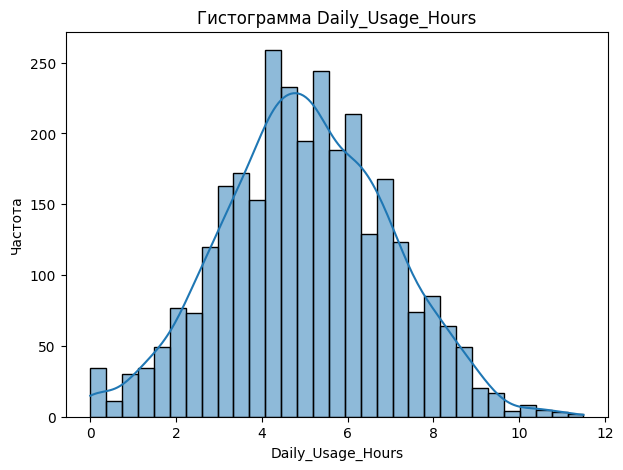

In [10]:
# Гистограмма
plt.figure(figsize=(7,5))
sns.histplot(data, kde=True)
plt.title(f'Гистограмма {column}')
plt.xlabel(column)
plt.ylabel('Частота')
plt.show()

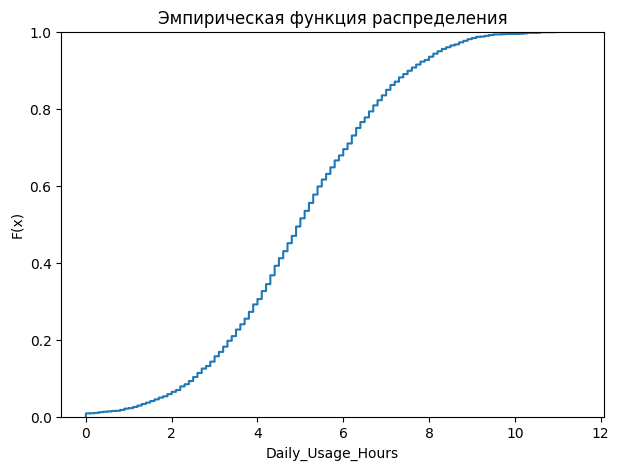

In [11]:
# Эмпирическая функция распределения
plt.figure(figsize=(7,5))
sns.ecdfplot(data)
plt.title('Эмпирическая функция распределения')
plt.xlabel(column)
plt.ylabel('F(x)')
plt.show()

In [38]:
# Промежуточные выводы
# Асимметрия (0.02) близка к нулю, эксцесс (–0.12) также около нуля, 
# что указывает на близость к нормальному распределению по форме, но не гарантирует нормальности.

In [13]:
# Задание 2
# Проверить данные на нормальность, используя критерии: Хи-квадрат, Ассиметрии и эксцесса
# Построить Q-Q plot

In [14]:
num_bins = int(np.sqrt(len(data)))  
counts, bin_edges = np.histogram(data, bins=num_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

mu, sigma = mean_val, data.std()
expected = stats.norm.cdf(bin_edges[1:], mu, sigma) - stats.norm.cdf(bin_edges[:-1], mu, sigma)
expected *= len(data)

chi2 = np.sum((counts - expected)**2 / expected)
dof = len(counts) - 3  # оценка параметров μ и σ
p_value = 1 - stats.chi2.cdf(chi2, dof)

print("\n=== Проверка нормальности (хи-квадрат) ===")
print(f"χ² = {chi2:.2f}, dof={dof}, p-value={p_value:.3f}")
if p_value > 0.05:
    print("Не отвергаем H0: распределение похоже на нормальное.")
else:
    print("Отвергаем H0: распределение не похоже на нормальное.")


=== Проверка нормальности (хи-квадрат) ===
χ² = 234.93, dof=51, p-value=0.000
Отвергаем H0: распределение не похоже на нормальное.


In [15]:
print("\n=== Проверка по асимметрии и эксцессу ===")
print(f"Асимметрия={skew_val:.2f}, Эксцесс={kurt_val:.2f}")


=== Проверка по асимметрии и эксцессу ===
Асимметрия=0.02, Эксцесс=-0.12


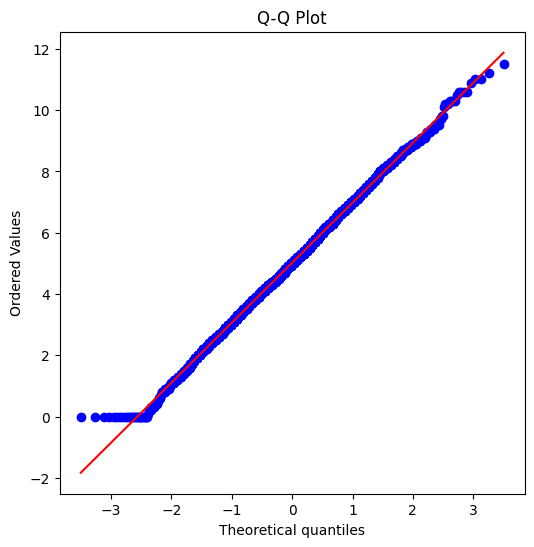

In [16]:
plt.figure(figsize=(6,6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [39]:
# Промежуточные выводы
# Критерий χ² показал χ² = 234.93, p-value = 0.000, что означает статистически значимое отклонение от нормального распределения.
# По критериям асимметрии и эксцесса распределение выглядит близким к нормальному, но формально тест χ² отвергает гипотезу нормальности.

In [18]:
# Задание 3
# Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью: Удаление, усечение выбросов, Стандартизация, нормировка, Логарифмирование и т.п.
# Выполните пункты 1 и 2 для обработанных данных

In [29]:
# === 1. Удаление выбросов ===
q25, q50, q75 = data.quantile([0.25, 0.5, 0.75])
iqr_val = q75 - q25
lower = q25 - 1.5 * iqr_val
upper = q75 + 1.5 * iqr_val

data_clean = data[(data >= lower) & (data <= upper)]

# === 2. Стандартизация ===
data_standardized = (data_clean - data_clean.mean()) / data_clean.std()

# Повторяем описательные статистики
print("\n=== После обработки ===")

# Среднее
mean_val = data_standardized.mean()
# Дисперсия
var_val = data_standardized.var()
# Мода
mode_val = data_standardized.mode().iloc[0]
# Медиана
median_val = data_standardized.median()
# Квантили
q25, q50, q75 = data_standardized.quantile([0.25, 0.5, 0.75])
# Эксцесс
kurt_val = stats.kurtosis(data_standardized)
# Асимметрия
skew_val = stats.skew(data_standardized)
# Интерквартильный размах
iqr_val = q75 - q25

print(f"Среднее: {mean_val:.2f}")
print(f"Дисперсия: {var_val:.2f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val:.2f}")
print(f"Квантили 0.25/0.5/0.75: {q25:.2f}, {q50:.2f}, {q75:.2f}")
print(f"Эксцесс: {kurt_val:.2f}")
print(f"Асимметрия: {skew_val:.2f}")
print(f"IQR: {iqr_val:.2f}")


=== После обработки ===
Среднее: -0.00
Дисперсия: 1.00
Мода: -0.3114283294565923
Медиана: -0.00
Квантили 0.25/0.5/0.75: -0.67, -0.00, 0.67
Эксцесс: -0.24
Асимметрия: -0.05
IQR: 1.35


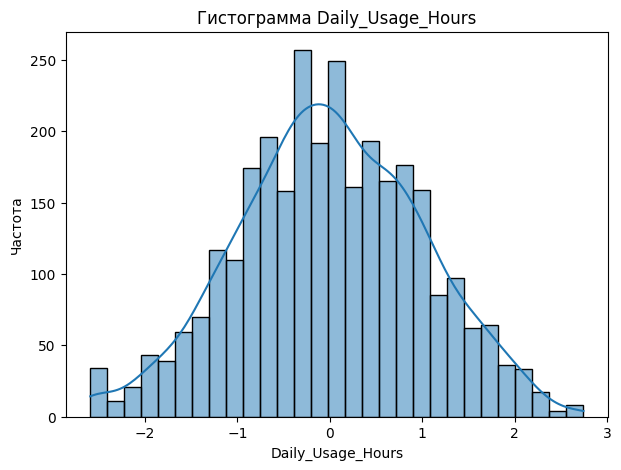

In [30]:
# Гистограмма
plt.figure(figsize=(7,5))
sns.histplot(data_standardized, kde=True)
plt.title(f'Гистограмма {column}')
plt.xlabel(column)
plt.ylabel('Частота')
plt.show()

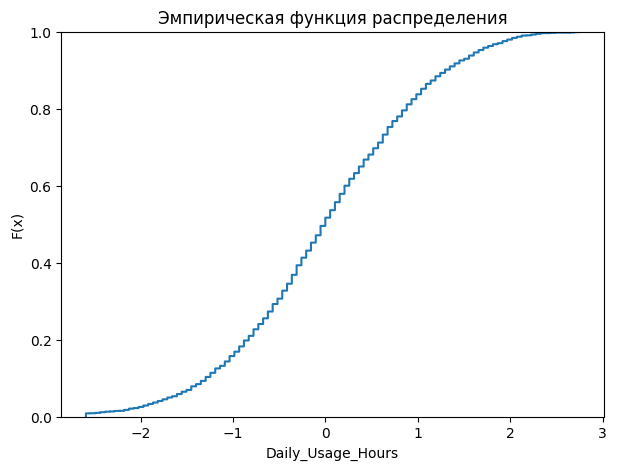

In [31]:
# Эмпирическая функция распределения
plt.figure(figsize=(7,5))
sns.ecdfplot(data_standardized)
plt.title('Эмпирическая функция распределения')
plt.xlabel(column)
plt.ylabel('F(x)')
plt.show()

In [32]:
num_bins = int(np.sqrt(len(data_standardized)))  
counts, bin_edges = np.histogram(data_standardized, bins=num_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

mu, sigma = mean_val, data.std()
expected = stats.norm.cdf(bin_edges[1:], mu, sigma) - stats.norm.cdf(bin_edges[:-1], mu, sigma)
expected *= len(data_standardized)

chi2 = np.sum((counts - expected)**2 / expected)
dof = len(counts) - 3  # оценка параметров μ и σ
p_value = 1 - stats.chi2.cdf(chi2, dof)

print("\n=== Проверка нормальности (хи-квадрат) ===")
print(f"χ² = {chi2:.2f}, dof={dof}, p-value={p_value:.3f}")
if p_value > 0.05:
    print("Не отвергаем H0: распределение похоже на нормальное.")
else:
    print("Отвергаем H0: распределение не похоже на нормальное.")


=== Проверка нормальности (хи-квадрат) ===
χ² = 1024.89, dof=51, p-value=0.000
Отвергаем H0: распределение не похоже на нормальное.


In [33]:
print("\n=== Проверка по асимметрии и эксцессу ===")
print(f"Асимметрия={skew_val:.2f}, Эксцесс={kurt_val:.2f}")


=== Проверка по асимметрии и эксцессу ===
Асимметрия=-0.05, Эксцесс=-0.24


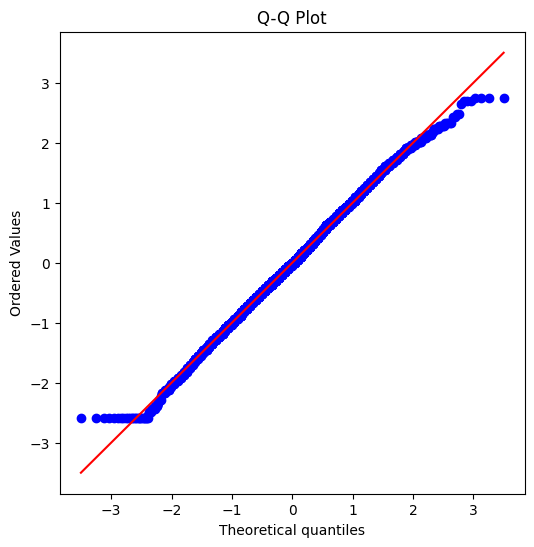

In [34]:
plt.figure(figsize=(6,6))
stats.probplot(data_standardized, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# Промежуточные выводы
# После стандартизации среднее стало 0, дисперсия 1.00, асимметрия приблизилась к нулю (–0.05), эксцесс также близок к нулю (–0.24).
# Однако критерий χ² снова показал χ² = 1024.89, p-value = 0.000, т.е. распределение формально остаётся ненормальным.
# Причина: стандартизация и нормировка меняют масштаб и центр, но не изменяют форму распределения.

In [36]:
# Задание 4
# Сгруппируйте данные по столбцу 'School_Grade'.
# На одном графике постройте гистограммы для каждой группы.
# Рассчитайте среднее, дисперсию внутри каждой группы


=== Средние по группам ===
School_Grade
10th    4.977618
11th    5.061795
12th    4.936862
7th     5.077062
8th     5.066390
9th     5.012167
Name: Daily_Usage_Hours, dtype: float64

=== Дисперсии по группам ===
School_Grade
10th    3.812605
11th    3.635211
12th    3.735589
7th     3.883344
8th     4.009513
9th     3.912652
Name: Daily_Usage_Hours, dtype: float64


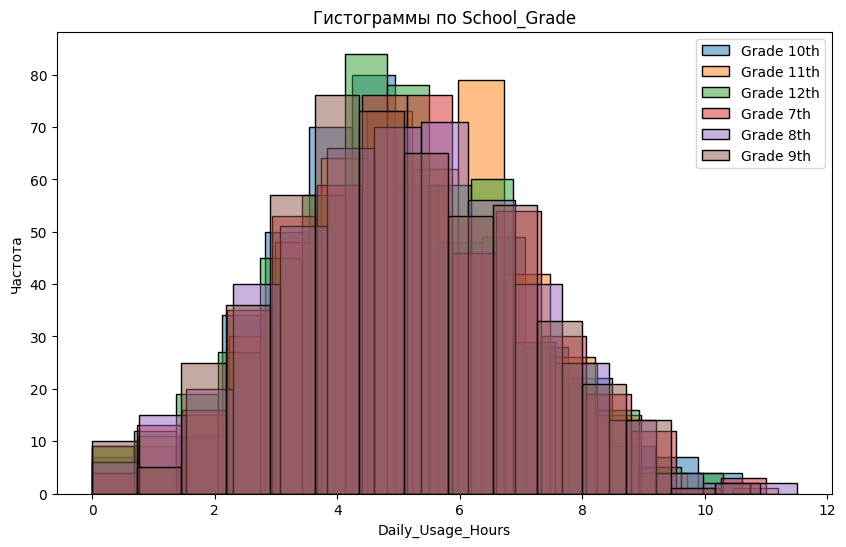

In [37]:
groups = df.groupby('School_Grade')[column]

means = groups.mean()
vars_ = groups.var()

print("\n=== Средние по группам ===")
print(means)
print("\n=== Дисперсии по группам ===")
print(vars_)

plt.figure(figsize=(10,6))
for grade, subset in groups:
    sns.histplot(subset.dropna(), kde=False, label=f'Grade {grade}', alpha=0.5, bins=15)
plt.title('Гистограммы по School_Grade')
plt.xlabel(column)
plt.ylabel('Частота')
plt.legend()
plt.show()

In [41]:
# Промежуточные выводы
# Средние значения в разных классах колеблются от 4.93 до 5.08 часов в день, дисперсии — от 3.63 до 4.01.
# Гистограммы показывают схожую форму распределений, но с небольшими сдвигами по среднему и различиями по разбросу.
# Это указывает на то, что в целом картина использования телефонов схожа во всех классах, но присутствуют небольшие различия:
# – у 7-го и 8-го классов наблюдается чуть больший разброс,
# – у 11-го класса — чуть меньший.